# Settings

In [1]:
# Install packages
!pip install optuna
!pip install torcheval
!pip install ipdb
!pip install pydicom
!pip install segment_anything
!pip install scikit-image

# Import classes
from TrainUtils.NetworkTrainer import NetworkTrainer
from DataUtils.XrayDataset import XrayDataset
from Enumerators.NetType import NetType

# Initialize the file system
import s3fs
s3 = s3fs.S3FileSystem()

# Initialize data

In [2]:
# Define seed
NetworkTrainer.set_seed(111099)

# Define variables
working_dir1 = "s3://dd-s-matteo-dev-resources/"

# Load data
train_data1 = XrayDataset.load_dataset(working_dir=working_dir1, dataset_name="xray_dataset_training", s3=s3)
val_data1 = XrayDataset.load_dataset(working_dir=working_dir1, dataset_name="xray_dataset_validation", s3=s3)
test_data1 = XrayDataset.load_dataset(working_dir=working_dir1, dataset_name="xray_dataset_test", s3=s3)

The dataset xray_dataset_training have been loaded!
The dataset xray_dataset_validation have been loaded!
The dataset xray_dataset_test have been loaded!


# Train network


Performing initial evaluation...
Training loss = 0.69424 - Training accuracy = 66.0655737% - Training F1-score = 0.0%
Performance for TRAINING set:
 - Accuracy: 66.07%
 - LOSS: 0.69
 - F1-score: 0.0%
 - AUC: 50.0%
 - MCC: 0.0

Validation loss = 0.6768 - Validation accuracy = 67.9012358% - Validation F1-score = 0.0
Performance for VALIDATION set:
 - Accuracy: 67.9%
 - LOSS: 0.68
 - F1-score: 0.0%
 - AUC: 50.0%
 - MCC: 0.0

Starting the training phase...

Epoch 1/500 completed...
 > train loss = 0.70319
 > train acc = 62.39%
 > val loss = 28.95221
 > val acc = 67.9%

Epoch 11/500 completed...
 > train loss = 0.64072
 > train acc = 65.86%
 > val loss = 28.95221
 > val acc = 67.9%


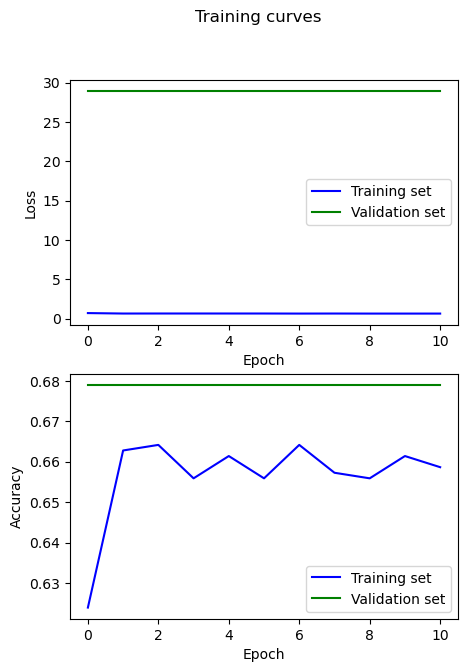


Epoch 21/500 completed...
 > train loss = 0.65227
 > train acc = 66.14%
 > val loss = 28.95221
 > val acc = 67.9%


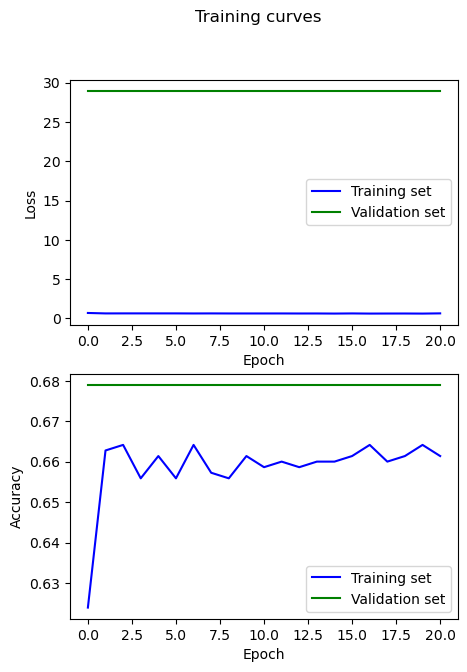


Epoch 31/500 completed...
 > train loss = 0.61148
 > train acc = 66.14%
 > val loss = 28.95221
 > val acc = 67.9%


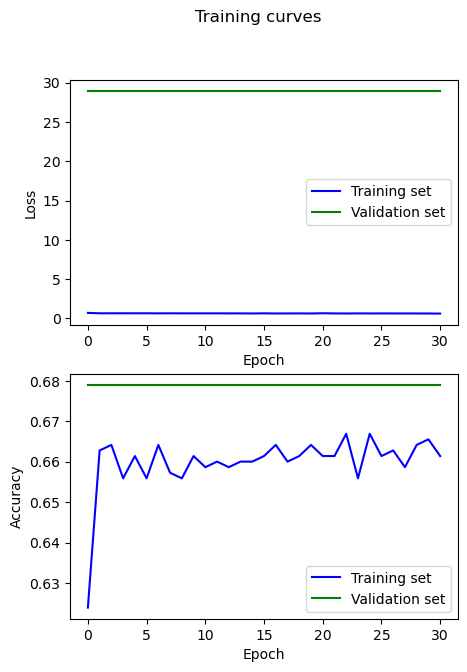


Epoch 41/500 completed...
 > train loss = 0.61118
 > train acc = 66.0%
 > val loss = 28.95221
 > val acc = 67.9%


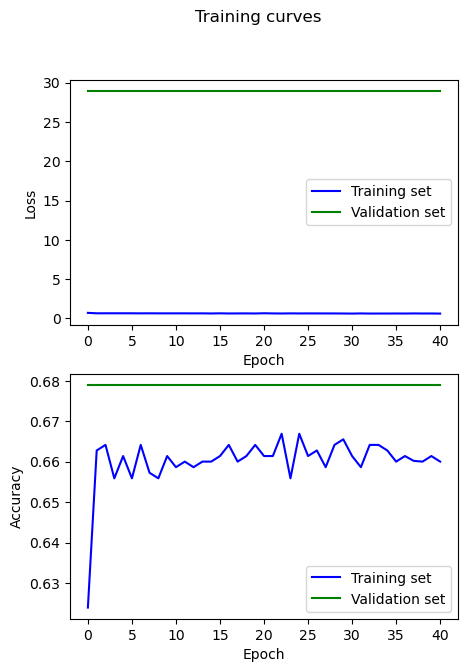


Epoch 51/500 completed...
 > train loss = 0.62017
 > train acc = 66.54%
 > val loss = 28.95221
 > val acc = 67.9%


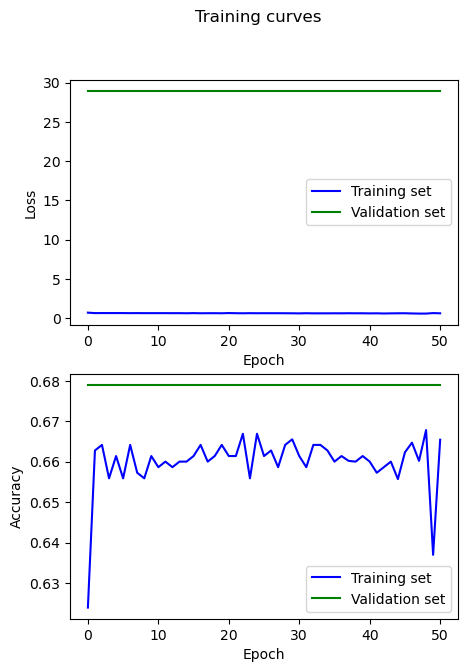

In [ ]:
# Define variables
model_name1 = "resnext101"
net_type1 = NetType.RES_NEXT101
epochs1 = 500
preprocess_inputs1 = True
trial_n1 = None
val_epochs1 = 10
use_cuda1 = True
assess_calibration1 = True
show_test1 = False

# Define trainer
net_params1 = {"n_conv_neurons": 2048, "n_conv_layers": 3, "kernel_size": 3, "n_fc_layers": 2, "optimizer": "Adam",
               "lr_last": 0.01, "lr_second_last_factor": 100, "batch_size": 64}
trainer1 = NetworkTrainer(model_name=model_name1, working_dir=working_dir1, train_data=train_data1,
                          val_data=val_data1, test_data=test_data1, net_type=net_type1, epochs=epochs1,
                          val_epochs=val_epochs1, preprocess_inputs=preprocess_inputs1, net_params=net_params1,
                          use_cuda=use_cuda1, s3=s3)

# Train model
trainer1.train(show_epochs=True)
trainer1.summarize_performance(show_test=show_test1, show_process=True, show_cm=True,
                               assess_calibration=assess_calibration1)

# Evaluate model
trainer1 = NetworkTrainer.load_model(working_dir=working_dir1, model_name=model_name1, trial_n=trial_n1,
                                     use_cuda=use_cuda1, s3=s3)